In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import re

In [2]:
def process_accuracy_metrics(df: pd.DataFrame):
    train_accuracy = df[df["key"].str.startswith("train")]["value"].values
    validation_accuracy = df[df["key"].str.startswith("val")]["value"].values
    test_accuracy = df[df["key"].str.startswith("test")]["value"].values

    return train_accuracy, validation_accuracy, test_accuracy


def process_loss_metrics(df: pd.DataFrame):
    train_loss = df[df["key"].str.startswith("train")]["value"].values
    validation_loss = df[df["key"].str.startswith("val")]["value"].values

    return train_loss, validation_loss

In [3]:
def plot_accuracy(metrics, ax): 
    train_acc, val_acc, test_acc = process_accuracy_metrics(metrics)

    ax.plot(train_acc, label="Train", marker="o", markersize=2, alpha=0.6)
    ax.plot(val_acc, label="Validation", marker="o", markersize=2, alpha=0.6)
    ax.axhline(test_acc[0], label="Test", ls="--", color="k", alpha=0.6)

    # Plot the point for max validation accuracy
    max_val_acc = np.max(val_acc)
    max_val_epoch = np.argmax(val_acc)  
    ax.plot(max_val_epoch, max_val_acc, marker="+", markersize=7, color="k")  # Red dot for the max point
    ax.text(max_val_epoch, max_val_acc * 1.01, f'Max: {max_val_acc:.2f}', color='k', fontsize=10, ha='left', va='bottom')

    # Plot the point for the final train and val accuracy
    ax.plot(len(train_acc)-1, train_acc[-1], marker="+", markersize=7, color="k")  
    ax.text(len(train_acc)-1, train_acc[-1] * 1.01, f'Final: {train_acc[-1]:.2f}', color='k', fontsize=10, ha='right', va='bottom')

    ax.plot(len(val_acc)-1, val_acc[-1], marker="+", markersize=7, color="k")  
    ax.text(len(val_acc)-1, val_acc[-1] * 1.01, f'Final: {val_acc[-1]:.2f}', color='k', fontsize=10, ha='right', va='bottom')

    # Add tick for test accuracy
    new_ticks = list(ax.get_yticks()) + [test_acc[0]]
    ax.set_yticks(new_ticks)

    ax.set_title(f"Accuracy v/s Number of Epochs")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Accuracy")
    ax.legend()
    ax.grid(alpha=0.4, ls="-")


def plot_loss(metrics, ax): 
    train_loss, val_loss = process_loss_metrics(metrics)

    ax.plot(train_loss, label="Train", marker="o", markersize=2, alpha=0.6)
    ax.plot(val_loss, label="Validation", marker="o", markersize=2, alpha=0.6)

    # Plot the point for min validation loss
    min_val_loss = np.min(val_loss)
    min_val_epoch = np.argmin(val_loss)  
    ax.plot(min_val_epoch, min_val_loss, marker="+", markersize=7, color="k")  
    ax.text(min_val_epoch, min_val_loss * 1.01, f'Min: {min_val_loss:.2f}', color='k', fontsize=10, ha='left', va='bottom')

    # Plot the final train and val loss
    ax.plot(len(train_loss)-1, train_loss[-1], marker="+", markersize=7, color="k")  
    ax.text(len(train_loss)-1, train_loss[-1] * 1.01, f'Final: {train_loss[-1]:.2f}', color='k', fontsize=10, ha='right', va='bottom')

    ax.plot(len(val_loss)-1, val_loss[-1], marker="+", markersize=7, color="k")  
    ax.text(len(val_loss)-1, val_loss[-1] * 1.01, f'Final: {val_loss[-1]:.2f}', color='k', fontsize=10, ha='right', va='bottom')    

    ax.set_title(f"Loss v/s Number of Epochs")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.legend()
    ax.grid(alpha=0.4, ls="-")


def plot_metrics(accuracy_metrics, loss_metrics, model_name:str): 
    # Create a figure with 2 subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

    # Plot accuracy in the first subplot (axes[0])
    plot_accuracy(accuracy_metrics, axes[0])
    
    # Plot loss in the second subplot (axes[1])
    plot_loss(loss_metrics, axes[1])

    plt.suptitle(model_name)

    file_name = re.sub("\W", "_", model_name.lower())
    file_path = "../assets/" + file_name + "_metrics.png"
    plt.savefig(file_path)

    plt.tight_layout()
    plt.show()


# VGG

In [4]:
vgg_v1_accuracy = pd.read_csv("../metrics/vgg_v1_accuracy.csv")
vgg_v1_loss = pd.read_csv("../metrics/vgg_v1_loss.csv")

vgg_v2_accuracy = pd.read_csv("../metrics/vgg_v2_accuracy.csv")
vgg_v2_loss = pd.read_csv("../metrics/vgg_v2_loss.csv")

vgg_v3_accuracy = pd.read_csv("../metrics/vgg_v3_accuracy.csv")
vgg_v3_loss = pd.read_csv("../metrics/vgg_v3_loss.csv")

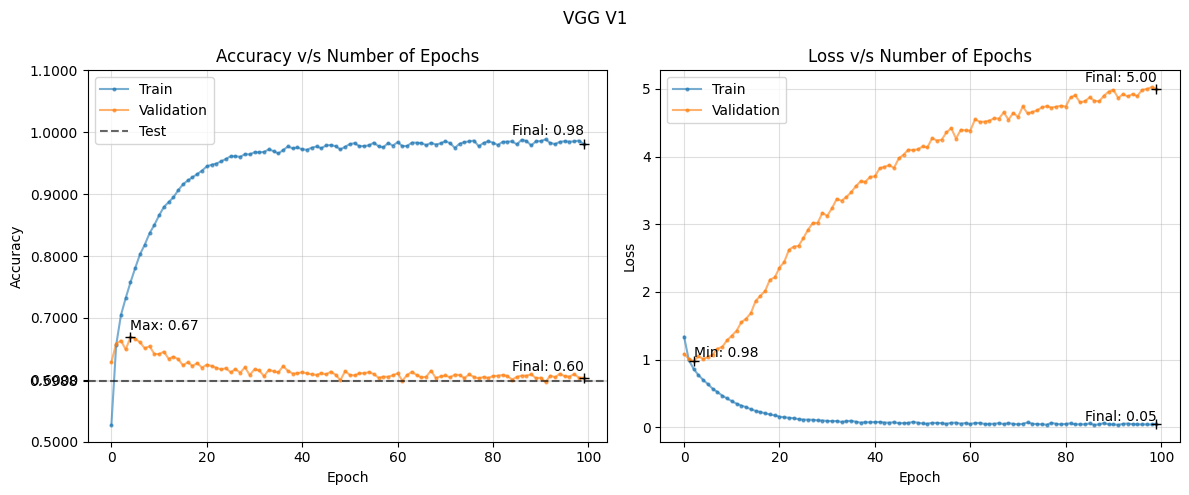

In [5]:
plot_metrics(vgg_v1_accuracy, vgg_v1_loss, "VGG V1")

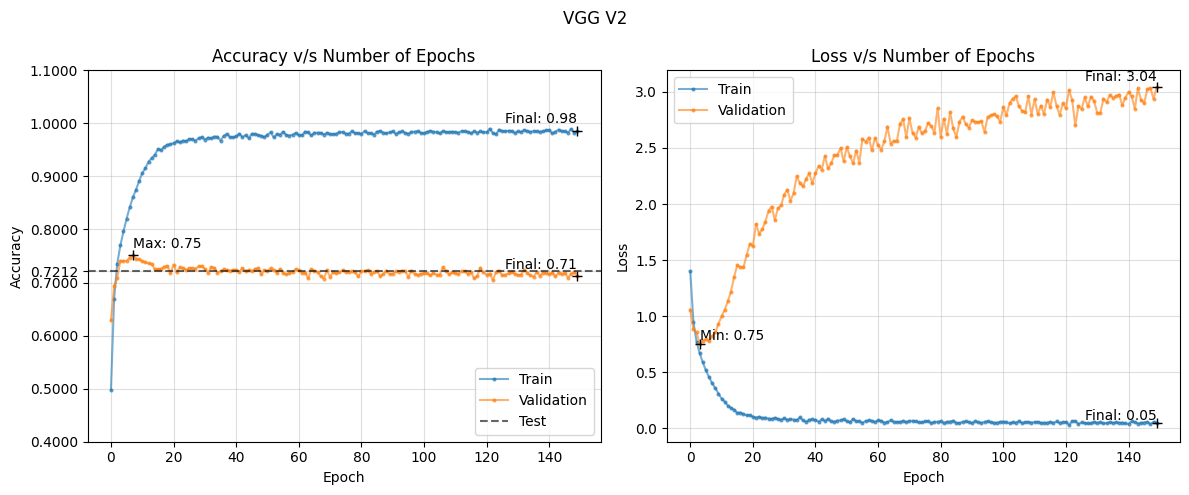

In [6]:
plot_metrics(vgg_v2_accuracy, vgg_v2_loss, "VGG V2")

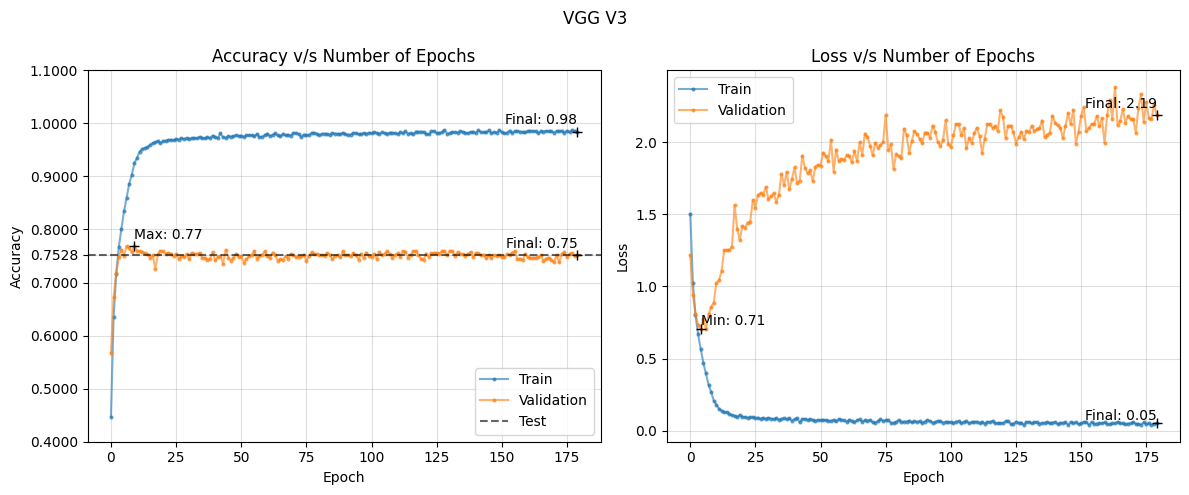

In [7]:
plot_metrics(vgg_v3_accuracy, vgg_v3_loss, "VGG V3")

# Inception 

In [8]:
inception_v1_accuracy = pd.read_csv("../metrics/inception_v1_accuracy.csv")
inception_v1_loss = pd.read_csv("../metrics/inception_v1_loss.csv")

inception_v2_accuracy = pd.read_csv("../metrics/inception_v2_accuracy.csv")
inception_v2_loss = pd.read_csv("../metrics/inception_v2_loss.csv")

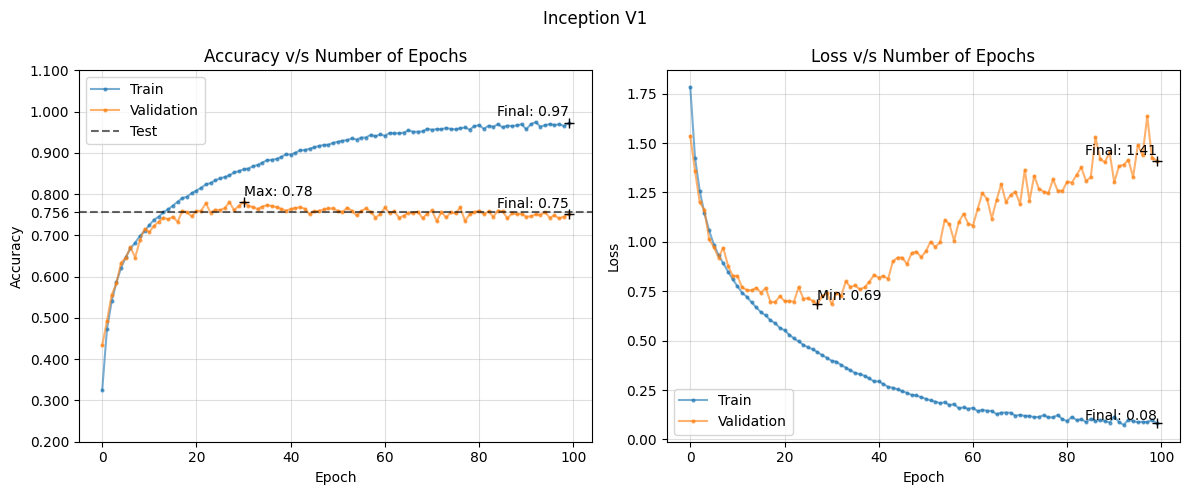

In [9]:
plot_metrics(inception_v1_accuracy, inception_v1_loss, "Inception V1")

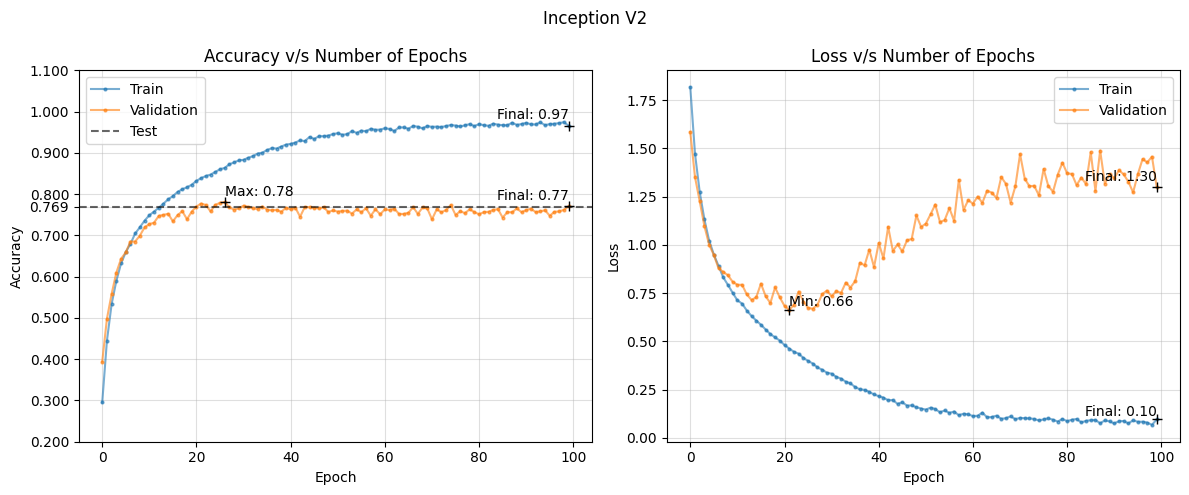

In [10]:
plot_metrics(inception_v2_accuracy, inception_v2_loss, "Inception V2")

# ResNet

In [11]:
resnet_v1_accuracy = pd.read_csv("../metrics/resnet_v1_accuracy.csv")
resnet_v1_loss = pd.read_csv("../metrics/resnet_v1_loss.csv")

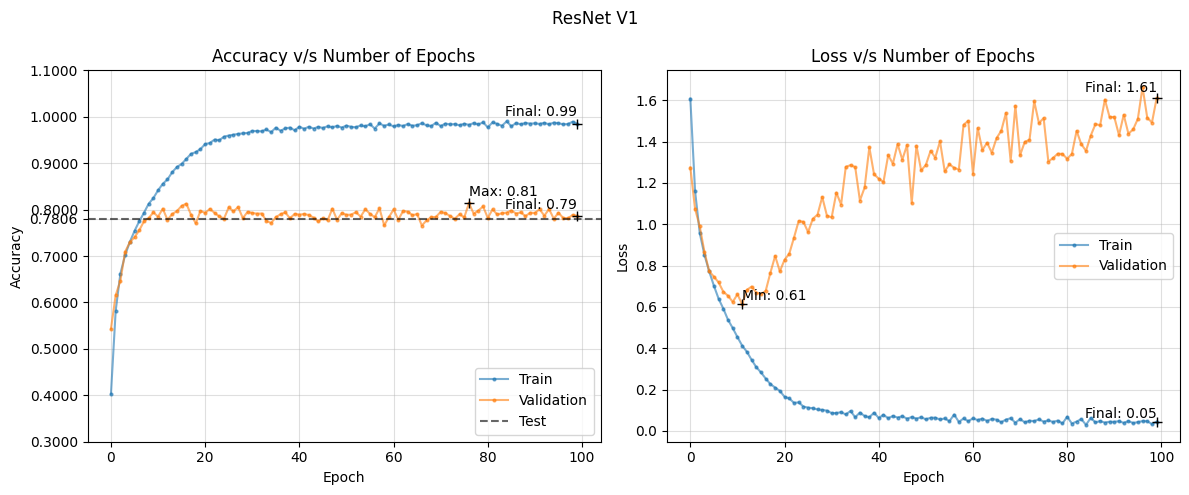

In [12]:
plot_metrics(resnet_v1_accuracy, resnet_v1_loss, "ResNet V1")

# Inception-ResNet

In [13]:
inception_resnet_v1_accuracy = pd.read_csv("../metrics/inception_resnet_v1_accuracy.csv")
inception_resnet_v1_loss = pd.read_csv("../metrics/inception_resnet_v1_loss.csv")

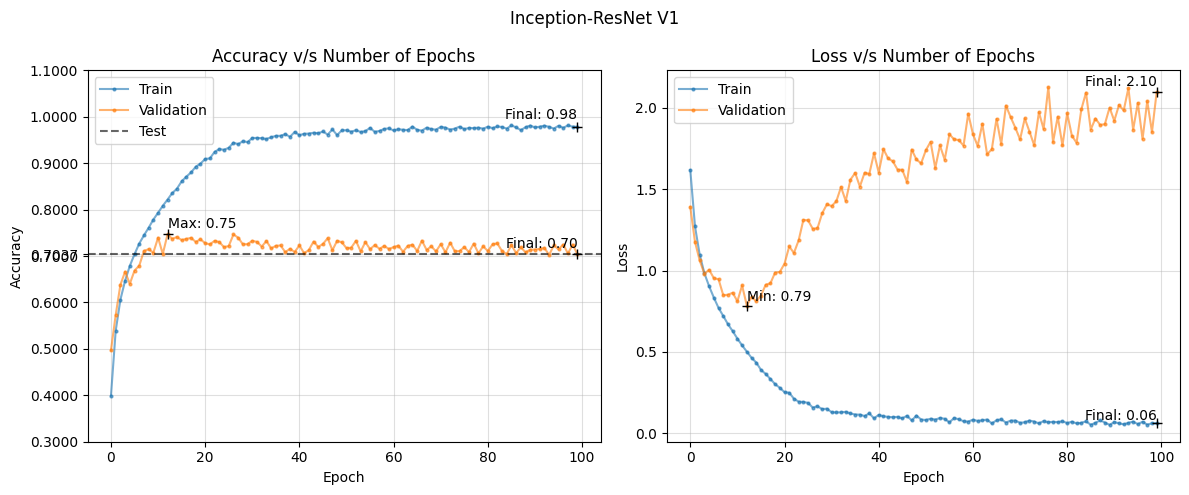

In [14]:
plot_metrics(inception_resnet_v1_accuracy, inception_resnet_v1_loss, "Inception-ResNet V1")